# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd

data = pd.read_csv('/datasets/data.csv')

print(data.head(10))
#print()
print(data.info())

data[data['days_employed'].isnull()].sum()

   children  days_employed  dob_years education  education_id  \
0         1   -8437.673028         42    высшее             0   
1         1   -4024.803754         36   среднее             1   
2         0   -5623.422610         33   Среднее             1   
3         3   -4124.747207         32   среднее             1   
4         0  340266.072047         53   среднее             1   
5         0    -926.185831         27    высшее             0   
6         0   -2879.202052         43    высшее             0   
7         0    -152.779569         50   СРЕДНЕЕ             1   
8         2   -6929.865299         35    ВЫСШЕЕ             0   
9         0   -2188.756445         41   среднее             1   

      family_status  family_status_id gender income_type  debt   total_income  \
0   женат / замужем                 0      F   сотрудник     0  253875.639453   
1   женат / замужем                 0      F   сотрудник     0  112080.014102   
2   женат / замужем                 0    

children                                                         1201
days_employed                                                       0
dob_years                                                       94856
education           среднеесреднеесреднеесреднеесреднеесреднеевысш...
education_id                                                     1741
family_status       гражданский бракженат / замужемНе женат / не з...
family_status_id                                                 2120
gender              MMFFFMFMFMFFFFFFMMMFFFFFMFFFFFFFMMFMFFMFFMFMFF...
income_type         пенсионергосслужащийпенсионергосслужащийпенсио...
debt                                                              170
total_income                                                        0
purpose             сыграть свадьбуобразованиестроительство жилой ...
dtype: object

**Вывод**

Пропуск в days_employed, total_income 2174 строк, что может иметь зависимость, так как days_employed это опыт в днях, а total_income - это ежемесячный заработок. и да, судя по sum у нас во всех строках нулевого опыта отсутствует заработок. Так же отрицательные значения в days_employed(Необходимо поменять). Но исходя из вопросов на которые мне следует ответить мне нужны столбцы children(количество детей), family_status(семейное положение), family_status_id(id статус семейного положения), total_income(ежемесячный доход), purpose(цель кредита), debt(имел ли задолженость)

In [2]:
data['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Отрицательные значения в children, а так же 76 людей с 20 детьми(кажется ошибка при записи).

In [3]:
data['dob_years'].value_counts().sort_values(ascending=False)

35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
66    183
22    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

101 людей имеют 0 лет. Исключать ли таких из списка? Пока не ясно

In [4]:
data['education'].value_counts()

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

ошибок нет, но есть дубликаты с uppercase и lowercase

In [5]:
data['education_id'].value_counts()

1    15233
0     5260
2      744
3      282
4        6
Name: education_id, dtype: int64

Судя по education то в education_id всё сходится по количеству id

In [6]:
data['family_status'].value_counts()

женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

Здесь по первому вгляду всё хорошо, хотя можно перевести в lowercase

In [7]:
data['family_status_id'].value_counts()

0    12380
1     4177
4     2813
3     1195
2      960
Name: family_status_id, dtype: int64

с family_status всё сходится по количеству ID

In [8]:
data['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

не понятные XNA. Попытаюсь посмотреть, что это

In [9]:
gender_xna = data[data['gender'] == 'XNA']
gender_xna

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,-2358.600502,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.157261,покупка недвижимости


Просмотр строки ничего не дал, значит дадим ему жить спокойно

In [10]:
data['income_type'].value_counts()

сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
предприниматель        2
безработный            2
студент                1
в декрете              1
Name: income_type, dtype: int64

Не знаю, что за работа такая - компаньон, ну и ладно. Тут всё в порядке по первому взгляду

In [11]:
data['debt'].value_counts()

0    19784
1     1741
Name: debt, dtype: int64

без комментариев

In [12]:
data['purpose'].value_counts()

свадьба                                   797
на проведение свадьбы                     777
сыграть свадьбу                           774
операции с недвижимостью                  676
покупка коммерческой недвижимости         664
покупка жилья для сдачи                   653
операции с жильем                         653
операции с коммерческой недвижимостью     651
жилье                                     647
покупка жилья                             647
покупка жилья для семьи                   641
строительство собственной недвижимости    635
недвижимость                              634
операции со своей недвижимостью           630
строительство жилой недвижимости          626
покупка недвижимости                      624
строительство недвижимости                620
покупка своего жилья                      620
ремонт жилью                              612
покупка жилой недвижимости                607
на покупку своего автомобиля              505
заняться высшим образованием      

Видно, что цели получения кредита похожи, поэтому лемматизация мне будет в помощь

Подводя итоги, тут есть пропуски, отрицательные значения, похожие цели на кредит, слова написанные заглавными буквами и прописными. Так же присутствует люди прожившие 0 лет, что интересно

## Шаг 2. Предобработка данных

### Обработка пропусков

Исходя из необходимости столбцов к ответам на вопросы будет рационально удалить столбец days_employed, так как в нем есть пропущенные значения. Что касается пропусков в total_income, то вижу смысл заменить пропуски на 0, так как удалять 10% информации не хочется, а судя по тому что пропуски в days_employed соответствуют пропускам в total_income, то скорее всего у людей нет опыта, и они не имеют заработок. Поэтому заменяю пропуски в total_income на 0

In [13]:
data.drop('days_employed', axis=1, inplace=True)

In [14]:
group = data.groupby(by=['income_type'])['total_income'].median()
for i, v in group.items():
    data.loc[(data['income_type'] == i) & (data['total_income'].isna()), 'total_income'] = v

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 11 columns):
children            21525 non-null int64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
dtypes: float64(1), int64(5), object(5)
memory usage: 1.8+ MB


In [15]:
data['total_income'].value_counts()

142594.396847    1105
172357.950966     509
118514.486412     414
150447.935283     147
499163.144947       2
                 ... 
133299.194693       1
115080.782380       1
84896.781597        1
153838.839212       1
150014.128510       1
Name: total_income, Length: 19353, dtype: int64

**Вывод**

По итогу удалил столбец с  данными по days_employed, и заменил пропуски на 0 в столбце total_income, так как считаю, что если нет стажа, значит то и нет ежемесячного дохода, что конечно же может быть ошибкой, но как мне кажется это лучше, чем удалять 10% данных, которые могут сказаться результате

### Замена типа данных

In [16]:
data.head(10)

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Решил проверить какие типы данных есть в каждом столбце. Написал функцию и применил её ко всему DataFrame

In [17]:
def check_type_col(row):
    total_income_type = {'int': 0, 'float': 0, 'str': 0}

    for i in row:
        if type(i) == int:
            total_income_type['int'] += 1
        if type(i) == str:
            total_income_type['str'] += 1
        if type(i) == float:
            total_income_type['float'] += 1
    return total_income_type


In [18]:
for col in data:
    print('Типы данных столбца', col, check_type_col(data[col]))
    print()

Типы данных столбца children {'int': 21525, 'float': 0, 'str': 0}

Типы данных столбца dob_years {'int': 21525, 'float': 0, 'str': 0}

Типы данных столбца education {'int': 0, 'float': 0, 'str': 21525}

Типы данных столбца education_id {'int': 21525, 'float': 0, 'str': 0}

Типы данных столбца family_status {'int': 0, 'float': 0, 'str': 21525}

Типы данных столбца family_status_id {'int': 21525, 'float': 0, 'str': 0}

Типы данных столбца gender {'int': 0, 'float': 0, 'str': 21525}

Типы данных столбца income_type {'int': 0, 'float': 0, 'str': 21525}

Типы данных столбца debt {'int': 21525, 'float': 0, 'str': 0}

Типы данных столбца total_income {'int': 0, 'float': 21525, 'str': 0}

Типы данных столбца purpose {'int': 0, 'float': 0, 'str': 21525}



In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 11 columns):
children            21525 non-null int64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
dtypes: float64(1), int64(5), object(5)
memory usage: 1.8+ MB


Исходя из вывода, видно что с типами данных всё в порядке, так что будем двигаться дальше.

**Вывод**

Странная история: одним вечером у меня почему-то после замены на 0 типы данных в столбце total_income стали разниться, и я их поменял. На другой день утром у меня стало всё нормально, но я всё равно написал функцию для проверки типов данных, и проверил такие ли типы данных нам нужны.

### Обработка дубликатов

В этой части я бы поработал со столбцами education, children и dob_years(что под сомнением, но посмотрел бы на людей с возрастом 0)

Начнем с education и сделаем все категории с нижним регистром

In [20]:
data['education'] = data['education'].str.lower()
data['education'].value_counts()

среднее                15233
высшее                  5260
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

In [21]:
data['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Судя по категориям с детьми у нас есть 47 с детьми -1, что неправильно, и 76 людей с 20-ю! детьми. Сделаю положительные значение, и поменяю значения 20 на 2, так как выглядит явной ошибкой, как будто случайно поставили 0.

In [22]:
data['children'] = abs(data['children'])
data.loc[data['children'] == 20, 'children'] = 2
data['children'].value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

Выглядит красиво. Остается посмотреть что там с dob_years

In [23]:
sort_by_dob_years = data[data['dob_years'] == 0]
count = 0

for i in sort_by_dob_years['debt']:
    if i == 0:
        count += 1 
print(len(sort_by_dob_years['debt']))        
print(count)

101
93


In [24]:
data[data['dob_years'] == 0].groupby('debt').debt.count()

debt
0    93
1     8
Name: debt, dtype: int64

In [25]:
count = 0

for i in sort_by_dob_years['gender']:
    if i == 'F':
        count += 1 
print(len(sort_by_dob_years['gender']))        
print(count)

101
72


In [26]:
data = data.drop_duplicates().reset_index(drop=True)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 11 columns):
children            21454 non-null int64
dob_years           21454 non-null int64
education           21454 non-null object
education_id        21454 non-null int64
family_status       21454 non-null object
family_status_id    21454 non-null int64
gender              21454 non-null object
income_type         21454 non-null object
debt                21454 non-null int64
total_income        21454 non-null float64
purpose             21454 non-null object
dtypes: float64(1), int64(5), object(5)
memory usage: 1.8+ MB


In [28]:
data.duplicated().sum()

0

Поанализировал зависимость столбца dob_years с людьми, у которых 0 лет жизни, с другими столбцами, и особо ничего не ясно. 101 из 21525 не сыграет большой роли, поэтому я бы ничего с этим не делал.

**Вывод**

Исходя из дубликатов здесь сделали нижний регист в столбце education, и поменял данные в children

### Лемматизация

Нам необходимо сделать лемматизацию столбца purpose, а для этого нужно просмотреть данные, чтобы определить, какие данные нам нужны.

In [29]:
data['purpose'].value_counts()

свадьба                                   791
на проведение свадьбы                     768
сыграть свадьбу                           765
операции с недвижимостью                  675
покупка коммерческой недвижимости         661
операции с жильем                         652
покупка жилья для сдачи                   651
операции с коммерческой недвижимостью     650
жилье                                     646
покупка жилья                             646
покупка жилья для семьи                   638
строительство собственной недвижимости    635
недвижимость                              633
операции со своей недвижимостью           627
строительство жилой недвижимости          624
покупка недвижимости                      621
покупка своего жилья                      620
строительство недвижимости                619
ремонт жилью                              607
покупка жилой недвижимости                606
на покупку своего автомобиля              505
заняться высшим образованием      

Пробегу по столбцу и проверю самые частые леммы из слов, которые есть, чтобы в последующем разделить их на группы.

In [30]:
from pymystem3 import Mystem
from collections import Counter
lemmas_list = []
m = Mystem()
for purpose in data['purpose']:
    lemmas = ''.join(m.lemmatize(purpose)).strip()
    lemmas_list.append(lemmas)
print(Counter(lemmas_list))

Counter({'автомобиль': 972, 'свадьба': 791, 'на проведение свадьба': 768, 'сыграть свадьба': 765, 'операция с недвижимость': 675, 'покупка коммерческий недвижимость': 661, 'операция с жилье': 652, 'покупка жилье для сдача': 651, 'операция с коммерческий недвижимость': 650, 'покупка жилье': 646, 'жилье': 646, 'покупка жилье для семья': 638, 'строительство собственный недвижимость': 635, 'недвижимость': 633, 'операция со свой недвижимость': 627, 'строительство жилой недвижимость': 624, 'покупка недвижимость': 621, 'покупка свой жилье': 620, 'строительство недвижимость': 619, 'ремонт жилье': 607, 'покупка жилой недвижимость': 606, 'на покупка свой автомобиль': 505, 'заниматься высокий образование': 496, 'сделка с подержанный автомобиль': 486, 'на покупка подержать автомобиль': 478, 'свой автомобиль': 478, 'на покупка автомобиль': 471, 'приобретение автомобиль': 461, 'дополнительный образование': 460, 'сделка с автомобиль': 455, 'высокий образование': 452, 'образование': 447, 'получение до

Я бы разделил все данные на : свадьба, образование, автомобиль, недвижимость. Ну и для неопределившихся другое

**Вывод**

Я сделаю 5 групп, и запишу их в отдельный столбец

### Категоризация данных

Для этого напишем функцию, и потом применим её к новому столбцу

In [31]:
m = Mystem() 

def create_category_purpose(row):
    lem_purpose = m.lemmatize(row['purpose'])
    
    if 'автомобиль' in lem_purpose:
        return 'автомобиль'
    if ('жилье' in lem_purpose) or ('недвижимость' in lem_purpose ):
        return 'недвижимость'
    
    if 'свадьба' in lem_purpose:
        return 'свадьба'
    
    if 'образование' in lem_purpose:
        return 'образование'
    return 'другое'

In [32]:
data['purpose_category'] = data.apply(create_category_purpose, axis=1)

In [33]:
data['purpose_category'].value_counts()

недвижимость    10811
автомобиль       4306
образование      4013
свадьба          2324
Name: purpose_category, dtype: int64

Выглядит здорово. Значит других категорих и нет совсем. Хотя возможно есть разница между коммерческой недвижимостью и недвижимостью для физ. лиц, но пока опустим этот момент.

In [34]:
data.head(10)

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,недвижимость
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,автомобиль
2,0,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,недвижимость
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,образование
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,свадьба
5,0,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья,недвижимость
6,0,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем,недвижимость
7,0,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование,образование
8,2,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы,свадьба
9,0,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи,недвижимость


Так же для ответа на вопрос "Есть ли зависимость между уровнем дохода и возвратом кредита в срок" , нам нужно разнести людей на группые по уровням дохода. Исходя из общих данных я бы их разнес на категории:

низкий доход, средний доход, высокий доход

Низкий доход буду считать тех людей, кто зарабатывает до 40% медианы, средних от 40 до 70% медианы, и высокие доходы все остальные.

In [39]:
median = data['total_income'].median() 

def create_total_income_group(row):
    total_income = row['total_income']
    
    if total_income < median * 0.4:
        return 'низкий доход'
    if median * 0.4 <= total_income < median * 0.85:
        return 'средний доход'
    if total_income >= median * 0.8:
        return 'высокий доход'

    

In [40]:
data['category_of_total_income'] = data.apply(create_total_income_group, axis=1)

In [41]:
data['category_of_total_income'].value_counts()

высокий доход    14104
средний доход     6679
низкий доход       671
Name: category_of_total_income, dtype: int64

оказывается тут все богатые!

In [42]:
data.head(10)

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category,category_of_total_income
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,недвижимость,высокий доход
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,автомобиль,средний доход
2,0,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,недвижимость,высокий доход
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,образование,высокий доход
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,свадьба,высокий доход
5,0,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья,недвижимость,высокий доход
6,0,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем,недвижимость,высокий доход
7,0,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование,образование,высокий доход
8,2,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы,свадьба,средний доход
9,0,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи,недвижимость,высокий доход


**Вывод**

## Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

Добавил новую сторчку для сводной таблицы

In [43]:
def create_debt(row):
    if row['debt'] == 1:
        return 'задолженность'
    elif row['debt'] == 0:
        return 'нет задолженности'
    return 'другое'

In [44]:
data['debt_status'] = data.apply(create_debt, axis=1)

In [45]:
table_child = data.pivot_table(
    index='debt_status',
    columns=['children'],
    values='debt',
    aggfunc='count')
display(table_child.sort_index(ascending=False))

children,0,1,2,3,4,5
debt_status,,,,,,
нет задолженности,13028.0,4410.0,1926.0,303.0,37.0,9.0
задолженность,1063.0,445.0,202.0,27.0,4.0,NaN


У кого 5 детей, тот не имеет задолженностей! Посчитаю что там с процентами в остальных

In [46]:
for i in table_child:
    print("процент задолженников среди", i, 'детей', (table_child[i][0] / table_child[i].sum()) * 100)

процент задолженников среди 0 детей 7.543822297920659
процент задолженников среди 1 детей 9.165808444902163
процент задолженников среди 2 детей 9.492481203007518
процент задолженников среди 3 детей 8.181818181818182
процент задолженников среди 4 детей 9.75609756097561
процент задолженников среди 5 детей nan


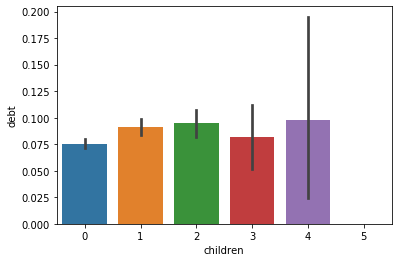

In [47]:
import seaborn as sns
sns.barplot(x="children", y="debt", data=data)

**Вывод**

Исходя из процентов я не вижу особой разницы между задолженностью и детьми. Но первый и второй ребенок явно тяжело для семьи.

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [48]:
table_family_status = data.pivot_table(
    index='debt_status',
    columns=['family_status'],
    values='debt',
    aggfunc='count')
display(table_family_status.sort_index(ascending=False))

family_status,Не женат / не замужем,в разводе,вдовец / вдова,гражданский брак,женат / замужем
debt_status,,,,,
нет задолженности,2536,1110,896,3763,11408
задолженность,274,85,63,388,931


In [49]:
for i in table_family_status:
    print("процент задолженников среди", i, (table_family_status[i][0] / table_family_status[i].sum()) * 100)

процент задолженников среди Не женат / не замужем 9.750889679715302
процент задолженников среди в разводе 7.112970711297072
процент задолженников среди вдовец / вдова 6.569343065693431
процент задолженников среди гражданский брак 9.347145266200915
процент задолженников среди женат / замужем 7.5451819434313965


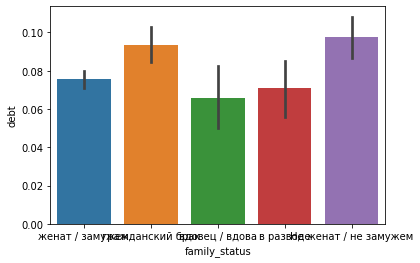

In [50]:
sns.barplot(x="family_status", y="debt", data=data)

**Вывод**

График не совсем читаемый, ибо название категорий длинноватые, но исходя из цифр опять же не вижу особой разницы между семейным положением людей. Но стоит отметить, что люди, которые не имеют отношений меньше просрачивают платеж по кредиту.

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [51]:
table_total_income = data.pivot_table(
    index='debt_status',
    columns=['category_of_total_income'],
    values='debt',
    aggfunc='count')
display(table_total_income.sort_index(ascending=False))

category_of_total_income,высокий доход,низкий доход,средний доход
debt_status,,,
нет задолженности,12965,629,6119
задолженность,1139,42,560


In [52]:
for i in table_total_income:
    print("процент задолженников среди:", i, (table_total_income[i][0] / table_total_income[i].sum()) * 100)

процент задолженников среди: высокий доход 8.075723199092456
процент задолженников среди: низкий доход 6.259314456035768
процент задолженников среди: средний доход 8.384488695912562


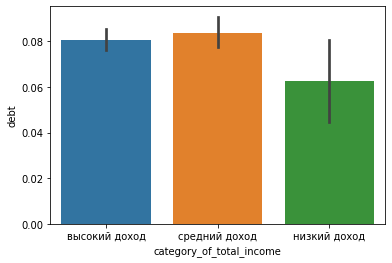

In [53]:
sns.barplot(x="category_of_total_income", y="debt", data=data)

**Вывод**

И снова разницы нет. Буквально 0.5% разницы между самым большим и самым малым. Но люди с меньшим доходом менее часто имеют задолженность по кредиту.

- Как разные цели кредита влияют на его возврат в срок?

In [55]:
table_purpose = data.pivot_table(
    index='debt_status',
    columns=['purpose_category'],
    values='debt',
    aggfunc='count')
display(table_purpose.sort_index(ascending=False))

purpose_category,автомобиль,недвижимость,образование,свадьба
debt_status,,,,
нет задолженности,3903,10029,3643,2138
задолженность,403,782,370,186


In [56]:
for i in table_purpose:
    print("процент задолженников среди:", i, (table_purpose[i][0] / table_purpose[i].sum()) * 100)

процент задолженников среди: автомобиль 9.359033906177427
процент задолженников среди: недвижимость 7.233373415965221
процент задолженников среди: образование 9.22003488661849
процент задолженников среди: свадьба 8.00344234079174


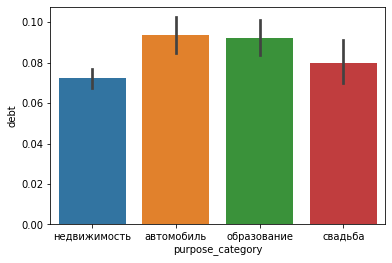

In [57]:
sns.barplot(x="purpose_category", y="debt", data=data)

**Вывод**

Зависимость не такая большая, но люди с заемами на недвижимость меньше всего имеют задолженность по кредиту, в то время как люди берущие кредит на автомобиль имеют больший процент задолженности по кредитам.

## Шаг 4. Общий вывод

Исходя из вопросов самые большие разницы в семейном положении, где вдовцы меньше всего просрачивают платеж по кредиту, а самые большой процент должников у не женатых/не замужних людей. Что касается количества детей, то люди без детей меньше всего просрачивают кредиты. Ну и интересная разница между целью кредита, где люди с целью на недвижимость меньше всего просрачивают кредиты, но автомобилисты среди этих людей на 2% хуже возвращают кредиты.